<a href="https://colab.research.google.com/github/nitinranjansharma/EVA5B2/blob/main/s7/s7_workflow_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [2]:
## importing and transforming data
from read_inputs import read_transform_inputs
trainset, trainloader, testset, testloader, classes = read_transform_inputs()

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

plane   dog  frog   cat


In [4]:
## defining model

from define_model import Net
!pip install torchsummary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 64, 32, 32]          18,432
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 64, 32, 32]           4,096
         MaxPool2d-8           [-1, 64, 16, 16]               0
            Conv2d-9          [-1, 128, 12, 12]          73,728
             ReLU-10          [-1, 128, 12, 12]               0
      BatchNorm2d-11          [-1, 128, 12, 12]             256
        MaxPool2d-12            [-1, 128, 6, 6]               0
           Conv2d-13            [-1, 128, 8, 8]         147,456
             ReLU-14            [-

In [5]:
##defining optimiser
from define_optim import optim_define
optimizer = optim_define(model)

In [6]:
## defining accuracy check and defining the training class
from truth_checker import truth_checker
from training_class import training_class
clf = training_class(model=model,trainloader = trainloader,testloader= testloader,device=device,
                     epoch=100,optimizer=optimizer)

In [7]:
## training process initiation
from train_iteration import train
criterion = nn.CrossEntropyLoss()
clf.fit()

epoch [0] train accuracy train - NA : test accuracy 0.518
epoch [1] train accuracy train - NA : test accuracy 0.608
epoch [2] train accuracy train - NA : test accuracy 0.663
epoch [3] train accuracy train - NA : test accuracy 0.694
epoch [4] train accuracy train - NA : test accuracy 0.701
epoch [5] train accuracy train - NA : test accuracy 0.730
epoch [6] train accuracy train - NA : test accuracy 0.735
epoch [7] train accuracy train - NA : test accuracy 0.741
epoch [8] train accuracy train - NA : test accuracy 0.760
epoch [9] train accuracy train - NA : test accuracy 0.757
epoch [10] train accuracy train - NA : test accuracy 0.764
epoch [11] train accuracy train - NA : test accuracy 0.775
epoch [12] train accuracy train - NA : test accuracy 0.768
epoch [13] train accuracy train - NA : test accuracy 0.781
epoch [14] train accuracy train - NA : test accuracy 0.778
epoch [15] train accuracy train - NA : test accuracy 0.779
epoch [16] train accuracy train - NA : test accuracy 0.789
epoch [

GroundTruth:    cat  ship  ship plane


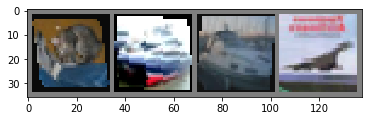

In [9]:
## checking test images

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
from accuracy_check import check_accuracy     
check_accuracy(testloader,device,model)

Accuracy of the network on the 10000 test images: 82 %


82.47

In [ ]:
##82.47%